# Bias-Variance Dilemma

## Libraries

In [1]:
import torch
import matplotlib.pyplot as plt

## Exercice 1

This exercice is based on the previous exercice about overfitting.

Create a function `create_dataset(N)` that draws $N = 20$ points $(x_i, y_i)$, $i=1,\dots,N$ ($x_i$'s are equidistant) according to the function:

$$
f_{\epsilon}(x) = \frac{1}{2}\ +\ \frac{1}{100}\exp\left(3x\right) + \epsilon,~~~x \in [-2, 2]
$$

where $\epsilon \sim \mathcal{N}(\mu=0, \sigma=0.3)$ is some normal noise.

In [2]:
def create_dataset(N):

    x = torch.arange(-2, 2, 4/N)

    y = 1/2 + 1/100 * torch.exp(3*x)
    epsilon = torch.normal(0, 0.3, (N,))
    y = y + epsilon
    
    return [x, y]

Then create $K = 5$ different datasets 

$$
\mathcal{S}_k = \left\{ (x_{k,i}, y_{k,i}) : i = 1, \dots, N \right\} \text{ for } k = 1, \dots, K
$$

and store them in a list or a dictionary.

In [3]:
N, K = 20, 5
datasets_d = {}

for i in range(20):
    datasets_d[i] = create_dataset(N)

In [4]:
datasets_d

{0: [tensor([-2.0000e+00, -1.8000e+00, -1.6000e+00, -1.4000e+00, -1.2000e+00,
          -1.0000e+00, -8.0000e-01, -6.0000e-01, -4.0000e-01, -2.0000e-01,
          -5.9605e-09,  2.0000e-01,  4.0000e-01,  6.0000e-01,  8.0000e-01,
           1.0000e+00,  1.2000e+00,  1.4000e+00,  1.6000e+00,  1.8000e+00]),
  tensor([0.5675, 0.3315, 0.5580, 0.3568, 1.0519, 0.6454, 0.9019, 0.1290, 0.0351,
          0.6806, 0.4136, 0.6392, 0.8750, 0.9042, 0.5304, 0.3442, 0.6040, 1.1080,
          2.0510, 2.9967])],
 1: [tensor([-2.0000e+00, -1.8000e+00, -1.6000e+00, -1.4000e+00, -1.2000e+00,
          -1.0000e+00, -8.0000e-01, -6.0000e-01, -4.0000e-01, -2.0000e-01,
          -5.9605e-09,  2.0000e-01,  4.0000e-01,  6.0000e-01,  8.0000e-01,
           1.0000e+00,  1.2000e+00,  1.4000e+00,  1.6000e+00,  1.8000e+00]),
  tensor([ 0.3142, -0.1065,  0.7691,  0.1428,  0.6053,  0.5253, -0.1799,  0.7170,
           0.2061,  0.4216,  0.3221,  0.7758,  0.1750,  0.8577,  0.4852,  0.3948,
           0.4189,  1.5857,  1.78

<div class="alert alert-block alert-info">

As in the previous exercice, we consider the **polynomial model**:
    
$$
\hat f(\alpha; x) = \sum_{d=0}^D \alpha_d x^d
$$

where $\alpha = (\alpha_0,\dots,\alpha_D)$ are the parameters of the model.

For instance, for $D = 3$, one has:
$
\hat f(\alpha; x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3
$.
</div>

<div class="alert alert-block alert-info">

We alsoo consider the following **loss function** to measure the ability of a model $\hat f(\alpha; x)$ to fit a set of points $\{ (x_i, y_i): i=1,\dots,N \}$ (sum of squared errors between the predictions and the true values):
\begin{align*}
\mathcal{L} \left( \alpha \right) & = \sum_{i=1}^N \left( \hat f(\alpha; x_i)  - y_i \right)^2 \\
& = \sum_{i=1}^N \left( \sum_{d=0}^D \alpha_d x_i^d - y_i \right)^2 \\
& = 
\left\|~
\left(
\begin{matrix}
x_1^0 & \cdots & x_1^D \\
\vdots &  & \vdots \\
x_N^0 & \cdots & x_N^D
\end{matrix}
\right)
\left(
\begin{matrix}
\alpha_0 \\
\vdots \\
\alpha_D
\end{matrix}
\right)
-
\left(
\begin{matrix}
y_1 \\
\vdots \\
y_N
\end{matrix}
\right)~
\right\|_{2}
\end{align*}
</div>

<div class="alert alert-block alert-info">

The **best model** is the one that minimizes the loss $\mathcal{L} \left( \alpha \right)$ on the train set

$$
\left\{ (x_{train_i}, y_{train_i}) : i=1,\dots,N \right\}
$$
    
i.e., it is the model

$$\hat f(\alpha^*; x)$$
where
\begin{align}
\alpha^* = (\alpha^*_0, \dots ,\alpha^*_D) & = \arg \min_{\alpha} \mathcal{L} \left( \alpha \right) \\
& = \arg \min_{\alpha}
\left\|~
\left(
\begin{matrix}
x_{train_1}^0 & \cdots & x_{train_1}^D \\
\vdots &  & \vdots \\
x_{train_N}^0 & \cdots & x_{train_N}^D
\end{matrix}
\right)
\left(
\begin{matrix}
\alpha_0 \\
\vdots \\
\alpha_D
\end{matrix}
\right)
-
\left(
\begin{matrix}
y_{train_1} \\
\vdots \\
y_{train_N}
\end{matrix}
\right)~
\right\|_{2}
\end{align}
</div>

The following function `fit(D, x_train, y_train)` returns the parameters

$$
\alpha^* = (\alpha^*_0, \dots, \alpha^*_D)
$$

of the best polynomial model $\hat f(\alpha^*; x)$ of degree `D` for the training set `x_train`, `y_train`.

In [5]:
def fit(D, x_train, y_train):
    
    # compute train features (matrix X of pb (1))
    A = x_train.unsqueeze(1).repeat(1, D+1)
    B = torch.arange(D+1).unsqueeze(0).repeat(len(x_train), 1)
    X_train = A ** B
    
    # compute best parameters alpha^* (solve pb (1))
    alpha_star = torch.linalg.lstsq(X_train, y_train).solution
    
    return alpha_star

For each dataset $\mathcal{S}_k$, $k = 1, \dots, K$ and for each degree $D = 1,\dots, 15$, compute the parameters $\alpha^* = (\alpha^*_0, \dots, \alpha^*_D)$ of the best model $\hat f(\alpha^*; x)$ of degree $D$ for the dataset $\mathcal{S}_k$.

Store these parameters in a list or a dictionary.

In [6]:
best_parameters_d = {}

for k in range(K):
    
    best_parameters_d[k] = []
    
    for D in range(15):
    
        x_train, y_train = datasets_d[k]
        alpha_star = fit(D, x_train, y_train)

        best_parameters_d[k].append(alpha_star)

In [7]:
best_parameters_d

{0: [tensor([0.7862]),
  tensor([0.8175, 0.3132]),
  tensor([0.4387, 0.3706, 0.2870]),
  tensor([ 0.3822, -0.1894,  0.3583,  0.2377]),
  tensor([ 0.5530, -0.2777, -0.0781,  0.2901,  0.1310]),
  tensor([ 0.5930,  0.1127, -0.2217, -0.1813,  0.1862,  0.1105]),
  tensor([ 0.4997,  0.2181,  0.2888, -0.3452, -0.2157,  0.1572,  0.0778]),
  tensor([ 0.5694,  0.8817, -0.2051, -1.9279,  0.2595,  1.0861, -0.0302, -0.1543]),
  tensor([ 0.4916,  1.0413,  0.5457, -2.3957, -0.8556,  1.4098,  0.4951, -0.2158,
          -0.0769]),
  tensor([ 0.5206,  1.3076,  0.2000, -3.4658, -0.2467,  2.5613,  0.1655, -0.6723,
          -0.0228,  0.0601]),
  tensor([ 5.1848e-01,  1.3147e+00,  2.3207e-01, -3.4999e+00, -3.2474e-01,
           2.6037e+00,  2.3164e-01, -6.9120e-01, -4.5618e-02,  6.2848e-02,
           2.7479e-03]),
  tensor([ 0.5270,  1.3891,  0.0753, -3.9619,  0.1188,  3.4041, -0.1943, -1.2557,
           0.1172,  0.2366, -0.0186, -0.0194]),
  tensor([ 0.5818,  1.0939, -1.1799, -1.8147,  4.7636, -0.8349,

Create a procedure `plot(D, k)` which plots the best model $\hat f(\alpha^*; x)$ of degree $D$ for the `k`-th dataset.

In [8]:
def plot(D, k):
        
    alpha_star = best_parameters_d[k][D]
    
    x = torch.arange(-2, 2, 1/10)
    y = torch.column_stack([x**i for i in range(len(alpha_star))])
    y = y @ alpha_star # matrix vector multiplication

    plt.plot(x, 
             y, 
             linestyle='-', 
             linewidth=0.5,
             color='red',
             label='polynomial model')

Plot the original function as well as the best models of degree 0 for all datasets.

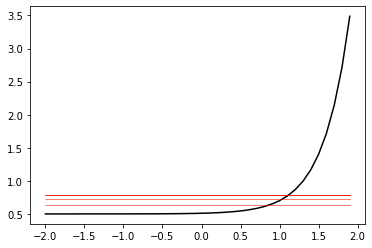

In [9]:
# plot function
x = torch.arange(-2, 2, 1/10)
y = 1/2 + 1/100 * torch.exp(3*x)

plt.plot(x, y, linestyle='-', color='black',label='original function')

for k in range(K):
    plot(0, k)

Plot the original function as well as the best models of degree 1 for all datasets.

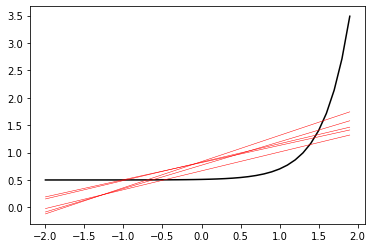

In [10]:
# plot function
x = torch.arange(-2, 2, 1/10)
y = 1/2 + 1/100 * torch.exp(3*x)

plt.plot(x, y, linestyle='-', color='black', label='original function')

for k in range(K):
    plot(1, k)

Plot the original function as well as the best models of degree 5 for all datasets.

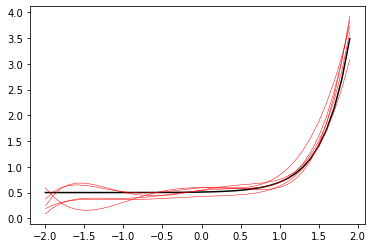

In [11]:
# plot function
x = torch.arange(-2, 2, 1/10)
y = 1/2 + 1/100 * torch.exp(3*x)

plt.plot(x, y, linestyle='-', color='black', label='original function')

for k in range(K):
    plot(5, k)

Plot the original function as well as the best models of degree 10 for all datasets.

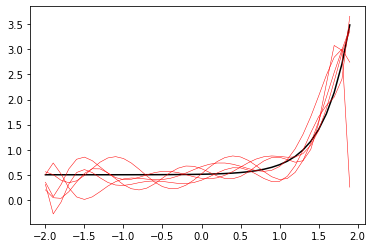

In [12]:
# plot function
x = torch.arange(-2, 2, 1/10)
y = 1/2 + 1/100 * torch.exp(3*x)

plt.plot(x, y, linestyle='-', color='black', label='original function')

for k in range(K):
    plot(10, k)

Create a procedure `plot_2(D)` which plots the original function as well as the mean and variance of the best models $\hat f(\alpha^*; x)$ of degree `D` for the all the datasets.

The mean model and its variance should be in the "confidence bands" style<br>
https://www.mattswint.com/matplotlib-confidence-bands/

In [13]:
def plot_2(D):
        
    x = torch.arange(-2, 2, 1/10)
    y = 1/2 + 1/100 * torch.exp(3*x)
    
    # plot original function
    plt.plot(x, y, linestyle='-', color='black', label='original function')
    
    # plot mean and std of all best models
    y_all = []
    
    # iterate over datasets
    for k in range(K):
        
        alpha_star = best_parameters_d[k][D]
        
        y = torch.column_stack([x**i for i in range(len(alpha_star))])
        y = y @ alpha_star # matrix vector multiplication
        y_all.append(y)
    
    # compute mean and std of the best models
    y = torch.column_stack(y_all)    
    y_mean = torch.mean(y, dim=1)
    y_std = torch.std(y, dim=1)
    
    # plot our confidence band
    plt.plot(x, y_mean, color='red', 
             label='mean and std of best models (over all datasets)')
    plt.fill_between(x, y_mean + y_std, y_mean - y_std,
                    alpha=0.2, color='tab:orange')
    
    plt.legend()

Make the plots for the best models of degrees 0, 1, 2, 3, 5, and 10.

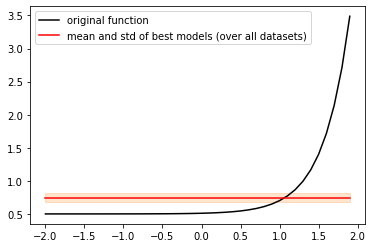

In [15]:
plot_2(0)

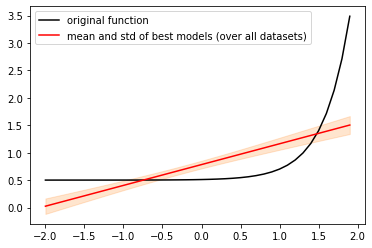

In [16]:
plot_2(1)

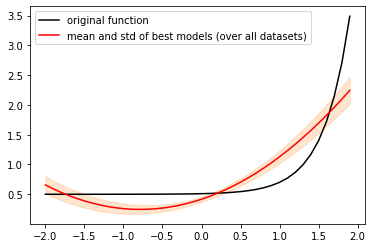

In [17]:
plot_2(2)

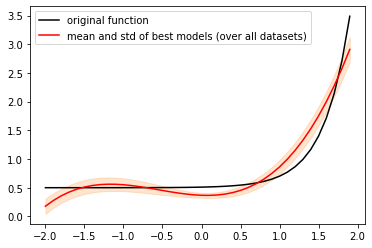

In [18]:
plot_2(3)

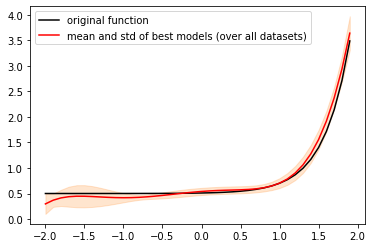

In [19]:
plot_2(5)

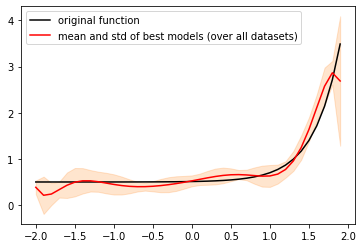

In [20]:
plot_2(10)

You should notice that as **the complexity (i.e., the degree) of the model increases**:
- **the bias of the best models decreases:**<br>
i.e. the red curves are closer and closer to the black curve.
- **the variance of the best models increases:**<br>
i.e. the orange confidence bands are getting larger.

This is the **bias-variance dilemma**.

- The **bias** represents the error due to the model complexity.
- The **variance** represents the sensitivity of the model to its underlying dataset.